In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

**Original Data Source - Life Expectancy:** https://apps.who.int/gho/athena/api/GHO/life_expectancy?target=GHO/WHOSIS_000001&profile=text&format=csv   
**Original Data Source - GDP per Capita:** https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=csv

In [3]:
life_expectancy = pd.read_csv('life_expectancy.csv')

In [4]:
life_expectancy.head(15)

,Indicator,PUBLISH STATES,Year,WHO region,World Bank income group,Country,Sex,Display Value,Numeric
0,Life expectancy at birth (years),Published,2010,Eastern Mediterranean,NaN,Afghanistan,Male,59.6,59.60036
1,Life expectancy at birth (years),Published,2010,Eastern Mediterranean,NaN,Afghanistan,Female,60.3,60.29720
2,Life expectancy at birth (years),Published,2010,Eastern Mediterranean,NaN,Afghanistan,Both sexes,59.9,59.94055
3,Life expectancy at birth (years),Published,2010,Africa,NaN,Angola,Male,55.8,55.77834
4,Life expectancy at birth (years),Published,2010,Africa,NaN,Angola,Female,60.5,60.52821
5,Life expectancy at birth (years),Published,2010,Africa,NaN,Angola,Both sexes,58.1,58.06943
6,Life expectancy at birth (years),Published,2015,Africa,NaN,Angola,Both sexes,61.7,61.71907
7,Life expectancy at birth (years),Published,2015,Europe,NaN,Albania,Male,76.1,76.10220
8,Life expectancy at birth (years),Published,2015,Europe,NaN,Albania,Female,79.7,79.68682
9,Life expectancy at birth (years),Published,2015,Europe,NaN,Albania,Both sexes,77.8,77.84428


##### What does each column represent?
* **Indicator:**  (UNNECESARY)  
* **PUBLISH STATES:**  (UNNECESARY)  
* **Year:**  
* **WHO region:**  
* **World Bank income group:**  
* **Country:**  
* **Sex:**  
* **Display Value:**  
* **Numeric:**  (UNNECESARY)   

Lets drop the unnecesary columns in order to simplify further work.

In [5]:
life_expectancy.drop(['Indicator','PUBLISH STATES','Numeric'], axis=1, inplace=True)
life_expectancy.head(15)

,Year,WHO region,World Bank income group,Country,Sex,Display Value
0,2010,Eastern Mediterranean,NaN,Afghanistan,Male,59.6
1,2010,Eastern Mediterranean,NaN,Afghanistan,Female,60.3
2,2010,Eastern Mediterranean,NaN,Afghanistan,Both sexes,59.9
3,2010,Africa,NaN,Angola,Male,55.8
4,2010,Africa,NaN,Angola,Female,60.5
5,2010,Africa,NaN,Angola,Both sexes,58.1
6,2015,Africa,NaN,Angola,Both sexes,61.7
7,2015,Europe,NaN,Albania,Male,76.1
8,2015,Europe,NaN,Albania,Female,79.7
9,2015,Europe,NaN,Albania,Both sexes,77.8


Much better.

### Let's tidy things up a little more.  
We'll drop duplicate columns (in case there is any).  
We'll lowercase the column headers.  
We'll display an statistical summary of table values.

In [6]:
life_expectancy.drop_duplicates()
life_expectancy.columns = map(str.lower, life_expectancy.columns)
life_expectancy.columns = life_expectancy.columns.str.replace(' ','_')
life_expectancy.info()
life_expectancy.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     2328 non-null   int64  
 1   who_region               2280 non-null   object 
 2   world_bank_income_group  60 non-null     object 
 3   country                  2196 non-null   object 
 4   sex                      2328 non-null   object 
 5   display_value            2328 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 109.2+ KB


,year,who_region,world_bank_income_group,country,sex,display_value
count,2328.000000,2280,60,2196,2328,2328.000000
unique,NaN,7,5,183,3,NaN
top,NaN,Europe,Low-income,Afghanistan,Male,NaN
freq,NaN,612,12,12,776,NaN
mean,2011.000000,NaN,NaN,NaN,NaN,70.233033
std,7.107862,NaN,NaN,NaN,NaN,8.831624
min,2000.000000,NaN,NaN,NaN,NaN,28.000000
25%,2007.500000,NaN,NaN,NaN,NaN,64.400000
50%,2012.500000,NaN,NaN,NaN,NaN,71.800000
75%,2016.000000,NaN,NaN,NaN,NaN,77.000000


In [7]:
print(life_expectancy['who_region'].unique())
print(life_expectancy['world_bank_income_group'].unique())
print(life_expectancy['sex'].unique())

['Eastern Mediterranean' 'Africa' 'Europe' 'Americas' 'Western Pacific'
 'South-East Asia' nan 'Global']
[nan 'Low-income' 'Lower-middle-income' 'Upper-middle-income'
 'High-income' 'Global']
['Male' 'Female' 'Both sexes']


## Structurally Missing Data
This dataset contains 2328 measurements of average life expectancy (at birth) from 7 WHO regions ('Eastern Mediterranean', 'Africa', 'Europe', 'Americas', 'Western Pacific',
 'South-East Asia' and 'Global'), 5 World Bank income groups ('Low-income', 'Lower-middle-income', 'Upper-middle-income', 'High-income' and 'Global'), 183 countries and 3 sex divisions ('Male', 'Female' and 'Both sexes').  
Although it seems there are missing values for 'WHO region', 'World Bank income group' and 'Country' that's only because there are certain rows dedicated exclusively to contain the average life expectancy for a whole 'WHO region' or 'World Bank income group', thus they do not display any value in the 'Country' feature. Alternatively, rows for global life expectancy (12 in total, for each combination of year and sex) contain the value 'global' both in the cells for 'WHO region' or 'World Bank income group'. Thus the irregular number on null values in some columns.
#### **Recapitulating**: we are good to go with the statistical analyses.

In [8]:
life_expectancy_2000 = life_expectancy[life_expectancy.year == 2000]
life_expectancy_2000.drop(['year'], axis=1, inplace=True)

life_expectancy_2010 = life_expectancy[life_expectancy.year == 2010]
life_expectancy_2010.drop(['year'], axis=1, inplace=True)

life_expectancy_2015 = life_expectancy[life_expectancy.year == 2015]
life_expectancy_2015.drop(['year'], axis=1, inplace=True)

life_expectancy_2019 = life_expectancy[life_expectancy.year == 2019]
life_expectancy_2019.drop(['year'], axis=1, inplace=True)

life_expectancy_2000.display_value.astype(int)


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


18      71
19      72
20      77
21      74
22      77
        ..
2302    73
2303    70
2322    69
2323    75
2324    72
Name: display_value, Length: 582, dtype: int32

## Life expectancy distribution across WHO regions

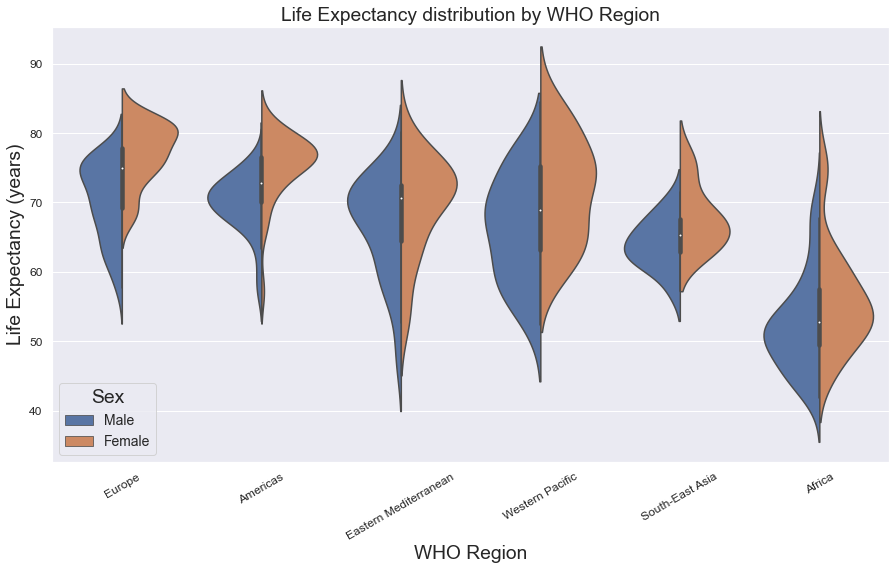

In [9]:
life_expectancy_2000 = life_expectancy_2000[life_expectancy_2000.sex != "Both sexes"]
life_expectancy_2000 = life_expectancy_2000[life_expectancy_2000.who_region != "Global"]

sns.set(font_scale = 1.6)
plt.figure(figsize=(15,8))
le_order = life_expectancy_2000.groupby(by=['who_region']).display_value.median().sort_values(ascending=False).index
violin = sns.violinplot(data=life_expectancy_2000, x="who_region", y="display_value", order=le_order, hue="sex", split=True)
plot_title= 'Life Expectancy distribution by WHO Region'
violin.set(xlabel='WHO Region', ylabel='Life Expectancy (years)', title=plot_title)
plt.legend(title='Sex', loc='lower left', fontsize=14)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Male vs Female expectancies across countries

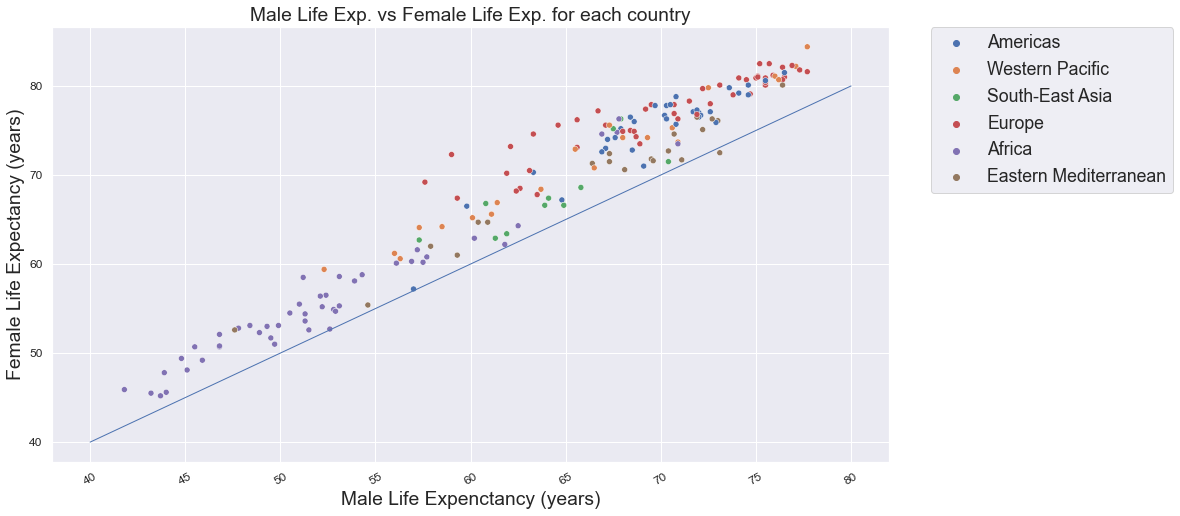

In [28]:
sns.set(font_scale = 1.6)
plt.figure(figsize=(15,8))

male_expectancy_2000 = life_expectancy_2000[(life_expectancy_2000.sex == "Male")]
female_expectancy_2000 = life_expectancy_2000[(life_expectancy_2000.sex == "Female")]
merged_expectancy_2000 = male_expectancy_2000.merge(right=female_expectancy_2000, on='country', how='left')
merged_expectancy_2000 = merged_expectancy_2000.dropna(axis=0, subset=['who_region_x','country','display_value_x','display_value_y'])

scatter = sns.scatterplot(data=merged_expectancy_2000, x='display_value_x', y='display_value_y', hue='who_region_x')
plot_title= 'Male Life Exp. vs Female Life Exp. for each country'
scatter.set(xlabel='Male Life Expenctancy (years)', ylabel='Female Life Expectancy (years)', title=plot_title)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
line = np.linspace(40, 80, 100)
plt.plot(line, line, linewidth=1)
plt.show()
